In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [5]:
df_I10= pd.read_csv('../datasets/Join_Collection_NSC2_BND_M20.csv')
df_I10.columns

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/Join_Collection_NSC2_BND_M20.csv'

In [ ]:
df_I10_Goni = df_I10[['MDCARE_STRT_DT','MCARE_SUBJ_CD','ED_RC_TOT_AMT',]]
df_I10_Goni

	ED_RC_TOT_AMT### 데이터 전처리
- 데이터의 갯수가 맞아야 함
- 대상 컬럼 의한 레코드 삭제 시 데이터셋 양 고려
- MDCARE_STRT_DT(요양개시일자), MCARE_SUBJ_CD(진료과목코드), ED_RC_TOT_AMT(심결요양급여비용총액)


In [9]:
df_I10_Goni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MDCARE_STRT_DT  4629 non-null   int64
 1   MCARE_SUBJ_CD   4629 non-null   int64
 2   ED_RC_TOT_AMT   4629 non-null   int64
dtypes: int64(3)
memory usage: 108.6 KB


In [7]:
df_I10_Goni.isnull().sum()

MDCARE_STRT_DT    0
MCARE_SUBJ_CD     0
ED_RC_TOT_AMT     0
dtype: int64

### EDA 전략
- 목표 변수와 각 설명 변수의 관계 확인
- 해당 변수(목표와 설명) 선택

In [10]:
df_I10_Goni.corr()

,MDCARE_STRT_DT,MCARE_SUBJ_CD,ED_RC_TOT_AMT
MDCARE_STRT_DT,1.000000,-0.028138,0.021376
MCARE_SUBJ_CD,-0.028138,1.000000,-0.001024
ED_RC_TOT_AMT,0.021376,-0.001024,1.000000


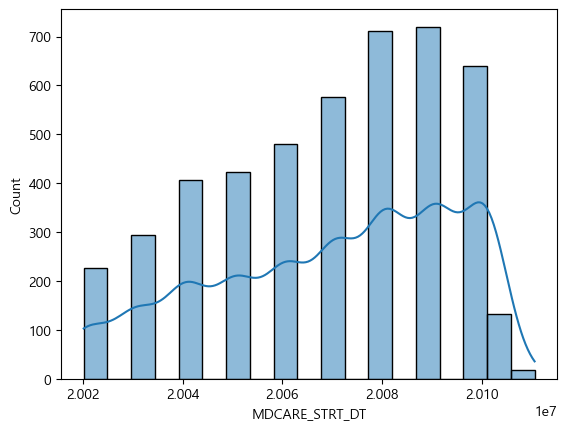

In [11]:
sns.histplot(data=df_I10_Goni, x='MDCARE_STRT_DT',kde=True)
plt.show()

In [13]:
df_I10_Goni['MDCARE_STRT_DT'].value_counts()

20091228    9
20091126    9
20101227    9
20090622    8
20081223    8
           ..
20040218    1
20040403    1
20041108    1
20041203    1
20050716    1
Name: MDCARE_STRT_DT, Length: 2138, dtype: int64

In [16]:
df_I10_Goni['MCARE_SUBJ_CD'].value_counts()

1     3875
0      415
23     160
5       86
2       29
6       19
19      19
21      15
3        5
4        3
24       3
Name: MCARE_SUBJ_CD, dtype: int64

In [34]:
df_I10_Goni['MCARE_SUBJ_CD']=df_I10_Goni['MCARE_SUBJ_CD'].astype(object)

C:\Users\01-10\AppData\Local\Temp\ipykernel_15552\1640152481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_I10_Goni['MCARE_SUBJ_CD']=df_I10_Goni['MCARE_SUBJ_CD'].astype(object)


In [20]:
df_I10_Goni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MDCARE_STRT_DT  4629 non-null   int64 
 1   MCARE_SUBJ_CD   4629 non-null   object
 2   ED_RC_TOT_AMT   4629 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 108.6+ KB


# 연속형 분포도 확인

<Axes: xlabel='MDCARE_STRT_DT', ylabel='Count'>

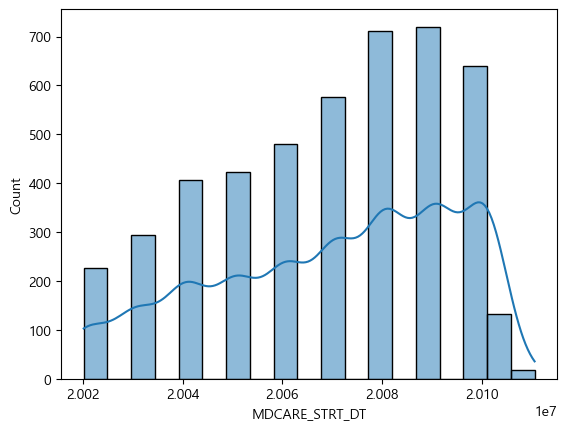

In [24]:
sns.histplot(data=df_I10_Goni, x='MDCARE_STRT_DT', kde=True)

<Axes: xlabel='ED_RC_TOT_AMT', ylabel='Count'>

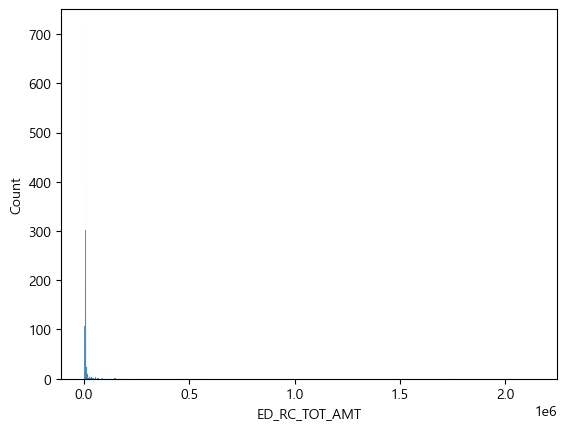

In [30]:
sns.histplot(data=df_I10_Goni, x='ED_RC_TOT_AMT')

# 범주형 분포도

<Axes: xlabel='MCARE_SUBJ_CD', ylabel='count'>

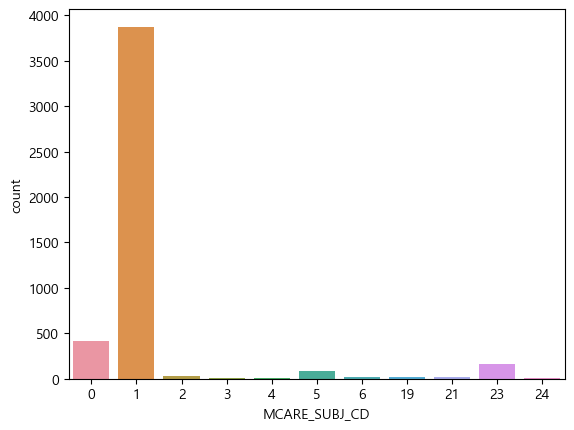

In [31]:
sns.countplot(data=df_I10_Goni, x='MCARE_SUBJ_CD') 